# MNIST Digit Classification
##### In this assignment, you will work with the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/) to implement and compare two supervised learning algorithms: Logistic Regression and Neural Networks. You will gain hands-on experience with data preprocessing, model training, evaluation, and visualization techniques commonly used in machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys

    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn

### Part 1: Data Loading and Exploration (4 points)
1. Load the MNIST dataset using fetch_openml
2. Print the following dataset characteristics:
   - Dataset dimensions and size
   - Number of classes
3. Visualize sample digits from the dataset

In [18]:
#Provide your code for part 1-1 here
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

In [5]:
#Provide your code for part 1-2 here
print(f"Dataset dimensions: {x.shape}")
print(f"Dataset size: {x.size}")
print(f"Number of classes: {len(np.unique(y))}")

Dataset dimensions: (70000, 784)
Dataset size: 54880000
Number of classes: 10


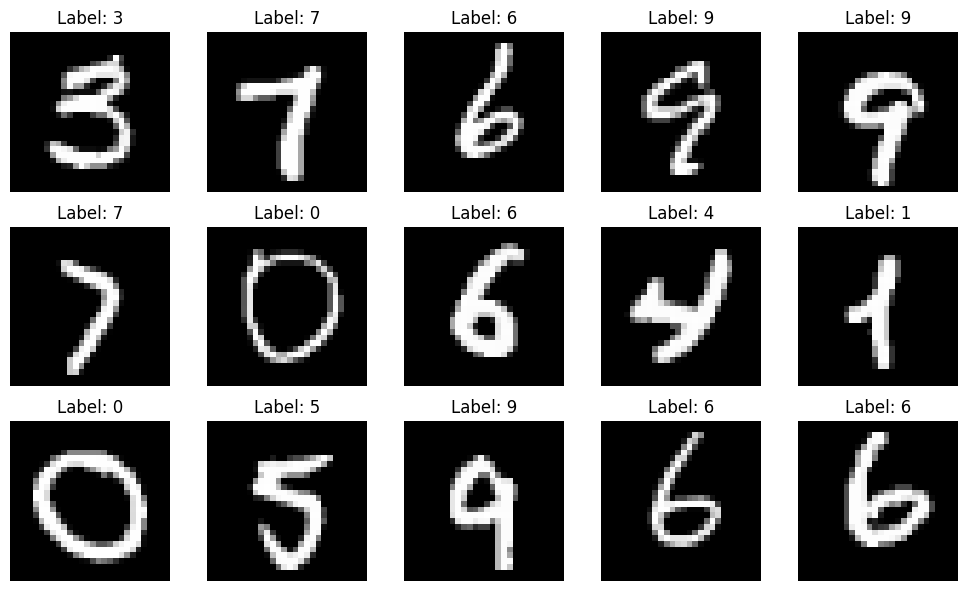

In [21]:
#Provide your code for part 1-3 here
# I made it so that it visualizes random numbers each time you run it
def plot_digits(X, y, n_rows=3, n_cols=5):
  plt.figure(figsize=(n_cols * 2, n_rows * 2))
  indices = np.random.choice(len(X), n_rows * n_cols, replace=False)
  for i, index in enumerate(indices):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(X[index].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[index]}")
    plt.axis('off')
  plt.tight_layout()
  plt.show()

plot_digits(X, y, n_rows=3, n_cols=5)

### Part 2: Data Preprocessing (4 points)
1. Scale the pixel values to range [0,1] by dividing by 255
2. Split the data into training (80%) and testing (20%) sets
3. Create a StandardScaler object and fit it on the training data
4. Transform both training and test data using the fitted scaler
5. Print the shapes of the resulting training and test sets

In [25]:
# Provide your code for part 2 here
X_scaled = X / 255

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (56000, 784)
y_train shape: (56000,)
X_test shape: (14000, 784)
y_test shape: (14000,)


### Part 3: Model Training and Evaluation (8 points)
1. Train a Logistic Regression model using the training data. Use the default parameters.
2. Train a Neural Network model using the training data. The neural network should have 2 hidden layers with 100 and 50 neurons respectively. Use the Adam optimizer and a learning rate of 0.001.

In [29]:
# Provide your code for part 3-1 here
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred_log_reg)

print("Logistic Regression Accuracy:", accuracy_score)
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9156428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



In [34]:
# Provide your code for part 3-2 here
nn = MLPClassifier(hidden_layer_sizes=(100, 50), solver = 'adam', max_iter=20, learning_rate_init=0.001, random_state = 42, verbose = True)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

Iteration 1, loss = 0.39369793
Iteration 2, loss = 0.13229420
Iteration 3, loss = 0.08835917
Iteration 4, loss = 0.06344949
Iteration 5, loss = 0.04784717
Iteration 6, loss = 0.03455777
Iteration 7, loss = 0.02710725
Iteration 8, loss = 0.02033840
Iteration 9, loss = 0.01751551
Iteration 10, loss = 0.01326335
Iteration 11, loss = 0.01357271
Iteration 12, loss = 0.01115600
Iteration 13, loss = 0.01407285
Iteration 14, loss = 0.01519496
Iteration 15, loss = 0.01564639
Iteration 16, loss = 0.00998418
Iteration 17, loss = 0.00682753
Iteration 18, loss = 0.00250302
Iteration 19, loss = 0.00160442
Iteration 20, loss = 0.00107310
Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.96      0.96      0.96      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.98      0.96      0.97      1273
           6       0.97      0.99      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



### Part 4: Model Comparison and Visualization (4 points)
1. Use a bar plot to compare the accuracy of both models on the test data
2. Print the classification report and confusion matrix for both models
3. Visualize the misclassified examples for both models

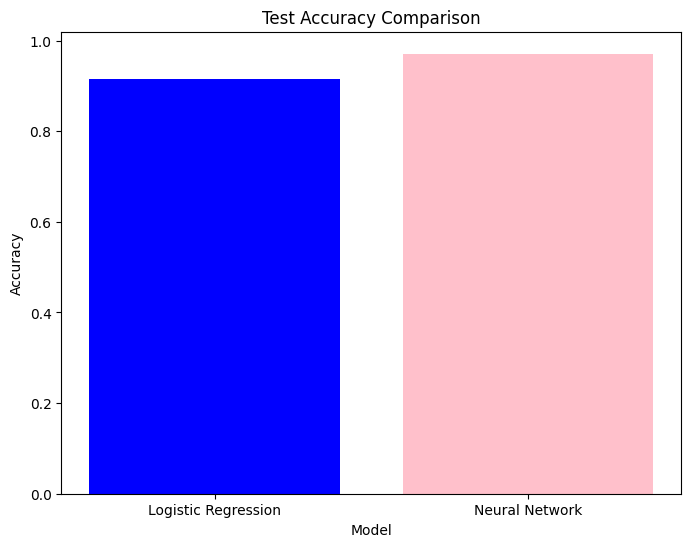

In [38]:
# Provide your code for part 4-1 here
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

models = ['Logistic Regression', 'Neural Network']
accuracies = [accuracy_log_reg, accuracy_nn]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'pink'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Comparison')
plt.show()

In [41]:
# Provide your code for part 4-2 here
print("Logistic Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

confusion_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
confusion_matrix_nn = confusion_matrix(y_test, y_pred_nn)

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix_log_reg)

print("Neural Network Confusion Matrix:")
print(confusion_matrix_nn)

Logistic Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.99      1600
        

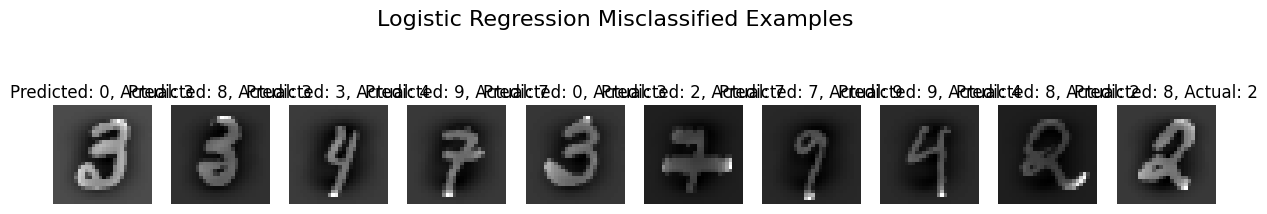

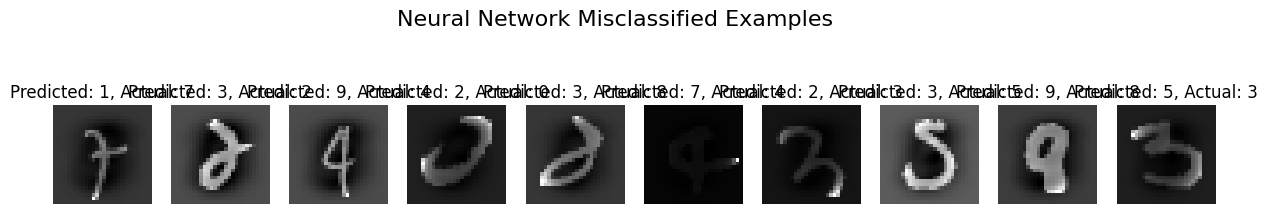

In [48]:
# Provide your code for part 4-3 here
def plot_misclassified(X_test, y_test, y_pred, title, n_samples=10):
    misclassified_indices = np.where(y_test != y_pred)[0]
    selected_indices = np.random.choice(misclassified_indices, n_samples, replace=False)

    plt.figure(figsize=(15, 3))
    for i, index in enumerate(selected_indices):
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {y_pred[index]}, Actual: {y_test[index]}")
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

plot_misclassified(X_test, y_test, y_pred_log_reg, "Logistic Regression Misclassified Examples")
plot_misclassified(X_test, y_test, y_pred_nn, "Neural Network Misclassified Examples")